# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance

https://finance.yahoo.com/

Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import matplotlib.pyplot as plt


In [3]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("google", "fred", "ff")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given for symbol, represents the pause be

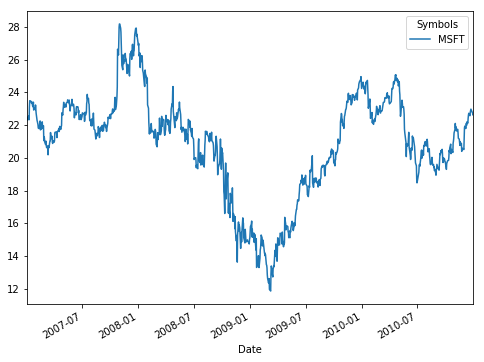

In [6]:
closes=web.DataReader(name=['MSFT'],data_source='yahoo',start='2007-01-01', end='2010-12-31')
closes2=closes['Adj Close']
closes2.plot(figsize=(8,6))

Ver la siguiente función...

In [7]:
# Función 
def get_closes(names,start,end):
    closes=web.DataReader(name=names,
                          data_source='yahoo',
                          start=start,
                          end=end)
    return closes['Adj Close']

In [10]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names=['AAPL','WMT','IBM','NKE']
# Fechas: inicios 2007 a finales de 2011
start, end = '2007-01-01', '2011-12-31'


In [11]:
# Obtenemos los precios ajustados en el cierre
closes=get_closes(names,start,end)
closes

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-03,7.982585,70.115562,7.344969,35.539825
2007-01-04,8.159763,70.865250,7.420171,35.711731
2007-01-05,8.101658,70.223694,7.432205,35.420235
2007-01-08,8.141665,71.290504,7.409646,35.128738
2007-01-09,8.817995,72.133919,7.502147,35.420235
2007-01-10,9.239983,71.283325,7.502147,35.338017
2007-01-11,9.125674,71.110329,7.518689,35.577209
2007-01-12,9.013269,71.607697,7.502147,35.861221
2007-01-16,9.249508,72.674530,7.517937,36.107872


¿Cómo lucen estos datos?

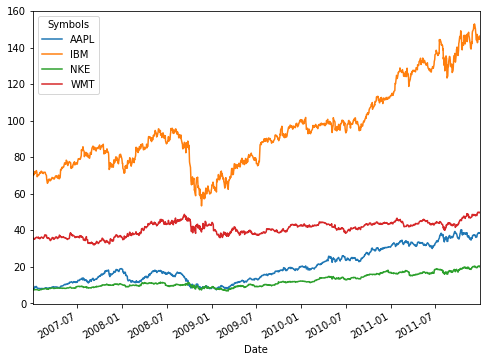

In [12]:
# Graficar
closes.plot(figsize=(8,6))

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [14]:
# Método describe
closes.describe()

Symbols,AAPL,IBM,NKE,WMT
count,1260.000000,1260.000000,1260.000000,1260.000000
mean,19.832021,94.923157,12.081497,40.869830
std,9.288125,22.821699,3.559465,3.765594
min,7.449142,53.358040,6.784579,32.052940
25%,12.138196,77.358494,9.248055,37.895436
50%,17.402131,91.103142,10.863345,41.708523
75%,27.529677,104.311302,15.320652,43.604858
max,40.221550,152.964447,20.428268,49.920921


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [15]:
# Método shift
closes.shift()

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,7.982585,70.115562,7.344969,35.539825
2007-01-05,8.159763,70.865250,7.420171,35.711731
2007-01-08,8.101658,70.223694,7.432205,35.420235
2007-01-09,8.141665,71.290504,7.409646,35.128738
2007-01-10,8.817995,72.133919,7.502147,35.420235
2007-01-11,9.239983,71.283325,7.502147,35.338017
2007-01-12,9.125674,71.110329,7.518689,35.577209
2007-01-16,9.013269,71.607697,7.502147,35.861221


In [16]:
# Entonces los rendimientos se calculan como
ret=((closes-closes.shift())/closes.shift()).dropna()
ret

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-04,0.022196,0.010692,0.010239,0.004837
2007-01-05,-0.007121,-0.009053,0.001622,-0.008162
2007-01-08,0.004938,0.015192,-0.003035,-0.008230
2007-01-09,0.083070,0.011831,0.012484,0.008298
2007-01-10,0.047855,-0.011792,0.000000,-0.002321
2007-01-11,-0.012371,-0.002427,0.002205,0.006769
2007-01-12,-0.012317,0.006994,-0.002200,0.007983
2007-01-16,0.026210,0.014898,0.002105,0.006878
2007-01-17,-0.022142,-0.007935,-0.001500,-0.002277


In [18]:
# Método pct_change
ret=closes.pct_change().dropna()
ret

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-04,0.022196,0.010692,0.010239,0.004837
2007-01-05,-0.007121,-0.009053,0.001622,-0.008162
2007-01-08,0.004938,0.015192,-0.003035,-0.008230
2007-01-09,0.083070,0.011831,0.012484,0.008298
2007-01-10,0.047855,-0.011792,0.000000,-0.002321
2007-01-11,-0.012371,-0.002427,0.002205,0.006769
2007-01-12,-0.012317,0.006994,-0.002200,0.007983
2007-01-16,0.026210,0.014898,0.002105,0.006878
2007-01-17,-0.022142,-0.007935,-0.001500,-0.002277


y la gráfica de los rendimientos se puede obtener como...

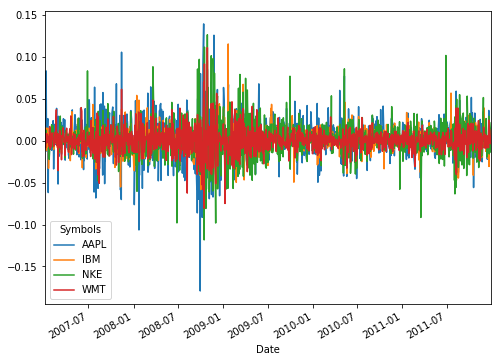

In [19]:
# Gráfica
ret.plot(figsize=(8,6))

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [20]:
# Rendimiento logarítmico
logret= np.log(closes/closes.shift()).dropna()
logret

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-04,0.021953,0.010635,0.010186,0.004825
2007-01-05,-0.007146,-0.009094,0.001620,-0.008196
2007-01-08,0.004926,0.015077,-0.003040,-0.008264
2007-01-09,0.079800,0.011761,0.012407,0.008264
2007-01-10,0.046745,-0.011862,0.000000,-0.002324
2007-01-11,-0.012448,-0.002430,0.002203,0.006746
2007-01-12,-0.012394,0.006970,-0.002203,0.007951
2007-01-16,0.025872,0.014788,0.002103,0.006854
2007-01-17,-0.022391,-0.007966,-0.001502,-0.002279


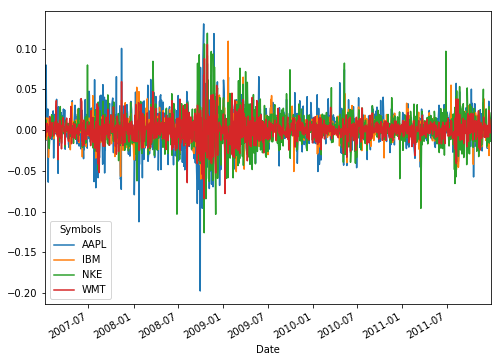

In [21]:
# Gráfica
logret.plot(figsize=(8,6))

In [22]:
# Valor absoluto de la diferencia
np.abs(ret-logret)

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2007-01-04,2.427374e-04,5.675699e-05,5.205847e-05,1.166061e-05
2007-01-05,2.547515e-05,4.122905e-05,1.313677e-06,3.349543e-05
2007-01-08,1.215291e-05,1.142369e-04,4.615946e-06,3.405055e-05
2007-01-09,3.270413e-03,6.943525e-05,7.728118e-05,3.423865e-05
2007-01-10,1.109795e-03,7.007549e-05,0.000000e+00,2.698208e-06
2007-01-11,7.715855e-05,2.949662e-06,2.427504e-06,2.280490e-05
2007-01-12,7.648824e-05,2.434674e-05,2.423942e-06,3.169534e-05
2007-01-16,3.375978e-04,1.098897e-04,2.211839e-06,2.354501e-05
2007-01-17,2.488112e-04,3.164830e-05,1.126852e-06,2.595859e-06


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [23]:
# Media y volatilidad de rendimientos
mu=ret.mean()
mu

Symbols
AAPL    0.001548
IBM     0.000706
NKE     0.001026
WMT     0.000365
dtype: float64

In [24]:
# Desviación estandar
desvest=ret.std()
desvest

Symbols
AAPL    0.024274
IBM     0.016224
NKE     0.021273
WMT     0.014048
dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.